In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from ssqueezepy import cwt, Wavelet
from ssqueezepy.utils import make_scales, cwt_scalebounds

import MyEDFImports as m

In [2]:
data = m.load_all_data()
labels = m.load_all_labels()
data,labels = m.remove_ecg_artifacts(data, labels)

Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CN223100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CP229110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:41: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CX230050.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/DG220020.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/DO223050.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_

/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:41: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


<RawEDF | CN223100.edf, 1 x 15611000 (31222.0 s), ~6 kB, data not loaded> with 1561 windows
<RawEDF | CP229110.edf, 1 x 20078000 (40156.0 s), ~6 kB, data not loaded> with 2007 windows
<RawEDF | CX230050.edf, 1 x 17981000 (35962.0 s), ~6 kB, data not loaded> with 1798 windows
<RawEDF | DG220020.edf, 1 x 17756000 (35512.0 s), ~6 kB, data not loaded> with 1775 windows
<RawEDF | DO223050.edf, 1 x 18066500 (36133.0 s), ~6 kB, data not loaded> with 1806 windows
<RawEDF | LA216100.edf, 1 x 16333500 (32667.0 s), ~6 kB, data not loaded> with 1633 windows
<RawEDF | LM230010.edf, 1 x 17246500 (34493.0 s), ~6 kB, data not loaded> with 1724 windows
<RawEDF | TK221110.edf, 1 x 15991000 (31982.0 s), ~6 kB, data not loaded> with 1599 windows
<RawEDF | VC209100.edf, 1 x 18434500 (36869.0 s), ~6 kB, data not loaded> with 1843 windows
<RawEDF | VP214110.edf, 1 x 17252500 (34505.0 s), ~6 kB, data not loaded> with 1725 windows
<RawEDF | WD224010.edf, 1 x 17774000 (35548.0 s), ~6 kB, data not loaded> with 1

In [28]:
example_data = data[12312]
len_signal = len(example_data)
wavelet = Wavelet('morlet')
# scale boundaries
min_scale, max_scale = cwt_scalebounds(wavelet, len_signal)
scales = make_scales(len_signal, scaletype='log', min_scale=min_scale, max_scale=max_scale)
my_scales = make_scales(len_signal, scaletype='log', min_scale=10, max_scale=2000)

CWT with auto_scales

Text(0.5, 1.0, 'coef_my')

<Figure size 640x480 with 0 Axes>

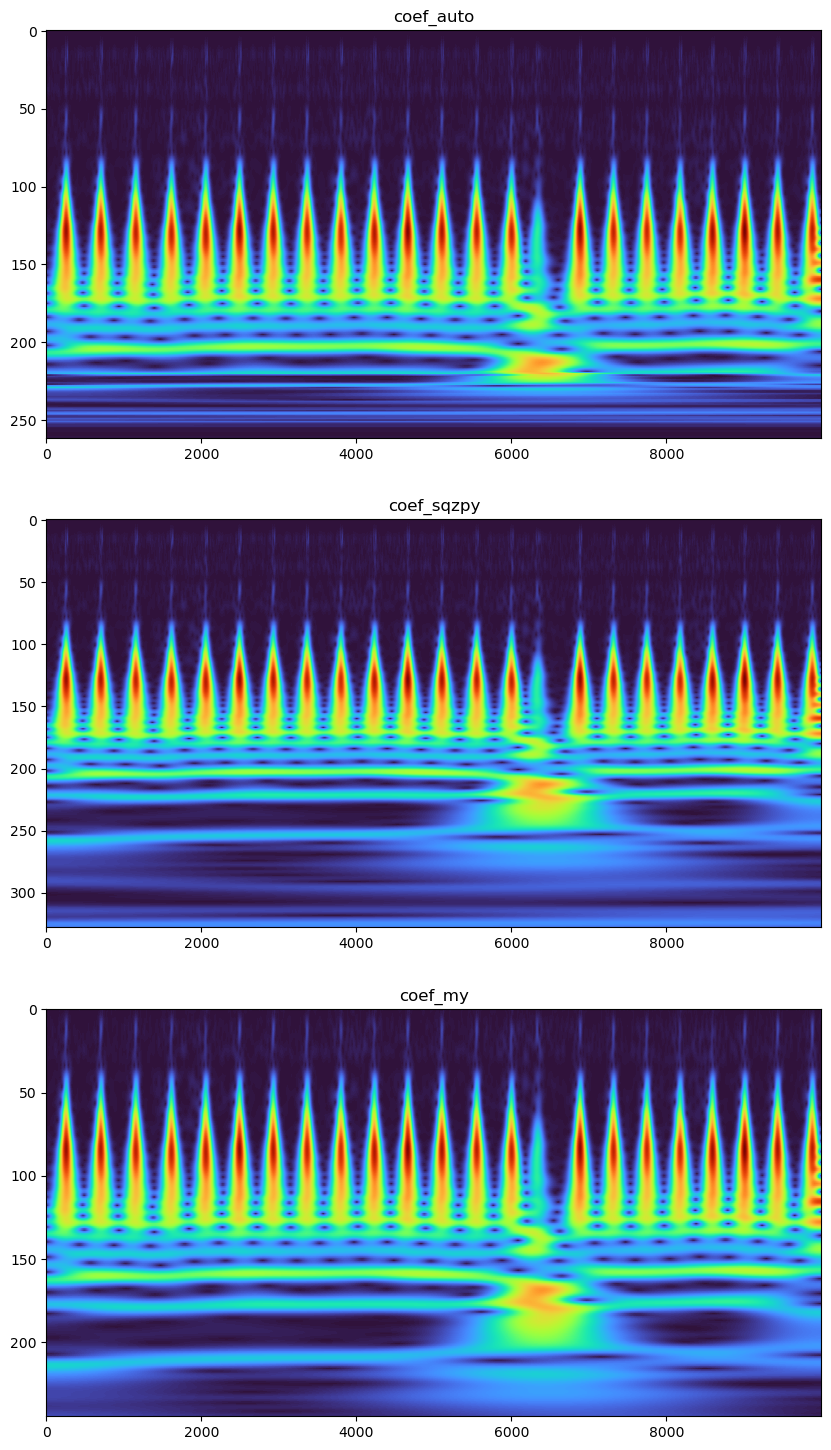

In [29]:
coef_auto, scale_auto = cwt(example_data, wavelet='morlet')
coef_my, *_ = cwt(example_data, wavelet='morlet', scales=my_scales)
coef_sqzpy, *_ = cwt(example_data, wavelet='morlet', scales=scales)
plt.figure()
f, axs = plt.subplots(3,1, figsize=(10,18))
axs[0].imshow(np.abs(coef_auto), aspect='auto', cmap='turbo')
axs[1].imshow(np.abs(coef_sqzpy), aspect='auto', cmap='turbo')
axs[2].imshow(np.abs(coef_my), aspect='auto', cmap='turbo')
axs[0].set_title('coef_auto')
axs[1].set_title('coef_sqzpy')
axs[2].set_title('coef_my')

In [ ]:
for d in data:
    print(np.average(d))

In [38]:
import torchvision.transforms as T

images = np.empty(shape=(len(data), 224, 224))
for i, datapoint in enumerate(data):
    if i+1 % 1000 == 0:
        print(i+1)
    coef, freq = cwt(datapoint, wavelet='morlet', scales=my_scales)
    abs_coef = np.abs(coef)
    torch_tensor = torch.from_numpy(abs_coef)
    # 10000 maybe not hard coded but taken from length of signal
    reshaped_torch_tensor = torch.reshape(torch_tensor, (1, 1, -1, 10000))
    resized_image_4d = T.Resize((224, 224))(reshaped_torch_tensor)
    resized_image_2d = torch.squeeze(resized_image_4d)

    images[i] = resized_image_2d
np.save(f'../images_cwt_ssq/{images.shape}_my_scales_sqpy', images)

0


/home/tadeusz/miniconda3/envs/tf/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000


CWT with scales from